[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gaurav.mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'Category': 'RequirementEnhancement', 'Sentiment': 'Positive', 'Priority': 'Low'}


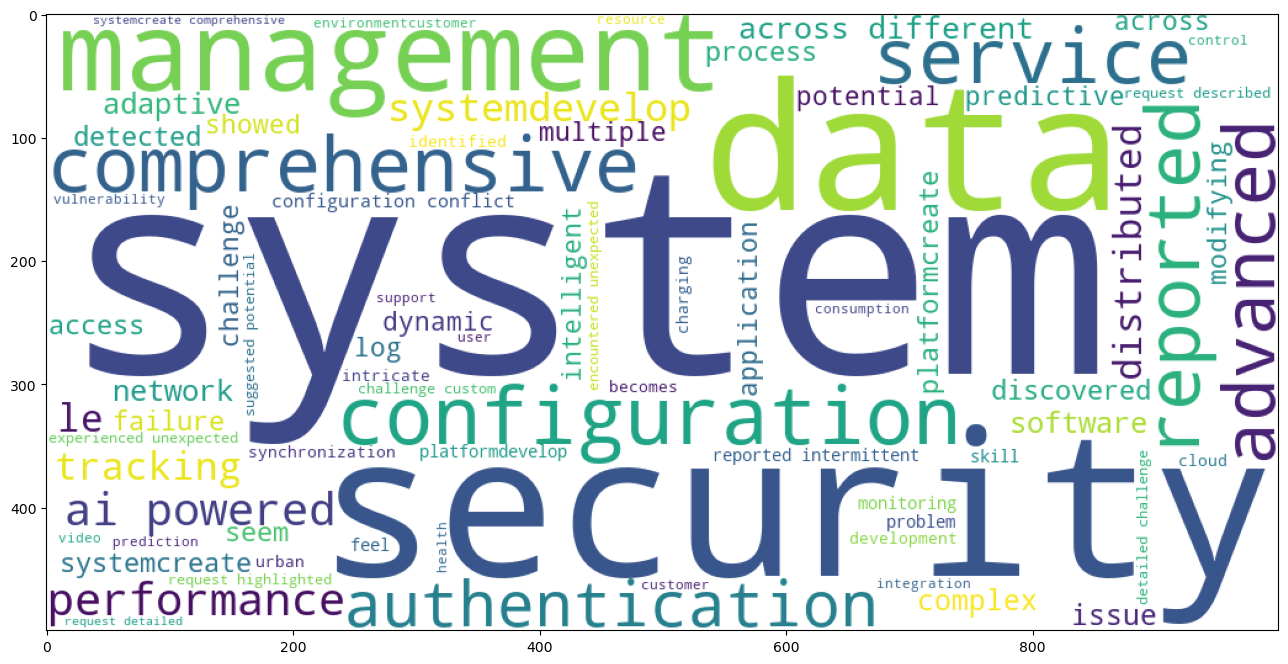

In [27]:
# Data manipulation
import pandas as pd
# Text pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
# Download necessary NLTK datasets
nltk.download(['punkt', 'averaged_perceptron_tagger', 'wordnet', 'vader_lexicon'])
# Feature extraction (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
# Model building
from sklearn.naive_bayes import MultinomialNB
# Model evaluation
from sklearn.metrics import (
    accuracy_score,precision_score,recall_score,classification_report)
from scikitplot.metrics import plot_confusion_matrix
# Data visualization
import seaborn as sns
import matplotlib as mlp
from wordcloud import WordCloud

#Read Dataset
df_train = pd.read_csv("C:\\Users\\gaurav.mittal\\OneDrive - Thermo Fisher Scientific\\Desktop\\Personal\\Personal\\Articles\\Infoworld\\SeriesOfArticles\\trainedData.txt",delimiter=';',names=['text','label'])



df_train.reset_index(inplace=True,drop=True)
# Object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus


# Generate WordCloud
mlp.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
mlp.pyplot.imshow(wordcloud)
# Convert text to feature matrix and extract labels for supervised learning
cv = CountVectorizer(ngram_range=(1, 2))
X = cv.fit_transform(corpus)
y = df_train.label

classifier = MultinomialNB()
classifier.fit(X, y)

sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    # Predict Category (Ensure it is a string)
    category = clf.predict(cv.transform([text]))[0]  # Extract first element

    # Sentiment Analysis
    sentiment_score = sia.polarity_scores(text)['compound']
    
    if sentiment_score >= 0.05:
        sentiment = "Positive"
    elif sentiment_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    priority = "High" if sentiment == "Negative" else "Medium" if sentiment == "Neutral" else "Low"

    return {
        "Category": category,"Sentiment": sentiment,"Priority": priority
    }
email_sentiments = get_sentiment('Add advanced filtering and export options for reports')
print(email_sentiments)